## Mantención Reactiva en Manufactura usando DA

In [2]:
__author__ = "Marcelo Gallegos"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
np.random.seed(seed=4)

In [5]:
equipo_modelo = pd.DataFrame(np.random.normal(size=(100,10)))

In [6]:
equipos = {'equipo_'+str(i):[] for i in range(1,11)}
for i in range(1,11):
    loc = np.random.uniform(0,1)
    scale = np.random.uniform(0,1)
    df = equipo_modelo+pd.DataFrame(np.random.normal(loc=loc,scale=scale,size=(100,10)))
    equipos['equipo_'+str(i)] = df

In [7]:
for equipo in equipos:
    print(f"Nivel Correlacion de {equipo} respecto a equipoModelo:", round(equipo_modelo.corrwith(equipos[equipo],axis=1).sum(),2))

Nivel Correlacion de equipo_1 respecto a equipoModelo: 88.18
Nivel Correlacion de equipo_2 respecto a equipoModelo: 72.3
Nivel Correlacion de equipo_3 respecto a equipoModelo: 77.11
Nivel Correlacion de equipo_4 respecto a equipoModelo: 99.89
Nivel Correlacion de equipo_5 respecto a equipoModelo: 67.31
Nivel Correlacion de equipo_6 respecto a equipoModelo: 94.82
Nivel Correlacion de equipo_7 respecto a equipoModelo: 80.23
Nivel Correlacion de equipo_8 respecto a equipoModelo: 83.06
Nivel Correlacion de equipo_9 respecto a equipoModelo: 98.66
Nivel Correlacion de equipo_10 respecto a equipoModelo: 99.94


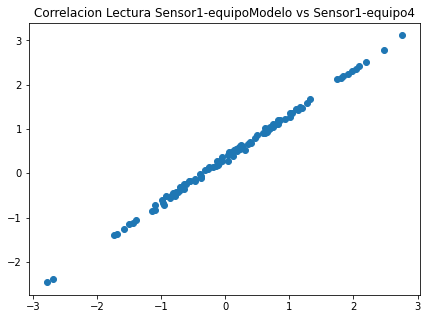

In [8]:
plt.figure(figsize=(7,5))
plt.scatter(equipo_modelo.loc[:,0],equipos['equipo_4'].loc[:,0])
plt.title("Correlacion Lectura Sensor1-equipoModelo vs Sensor1-equipo4")
plt.show()

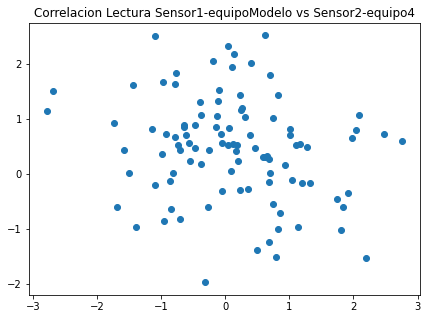

In [9]:
plt.figure(figsize=(7,5))
plt.scatter(equipo_modelo.loc[:,0],equipos['equipo_4'].loc[:,1])
plt.title("Correlacion Lectura Sensor1-equipoModelo vs Sensor2-equipo4")
plt.show()

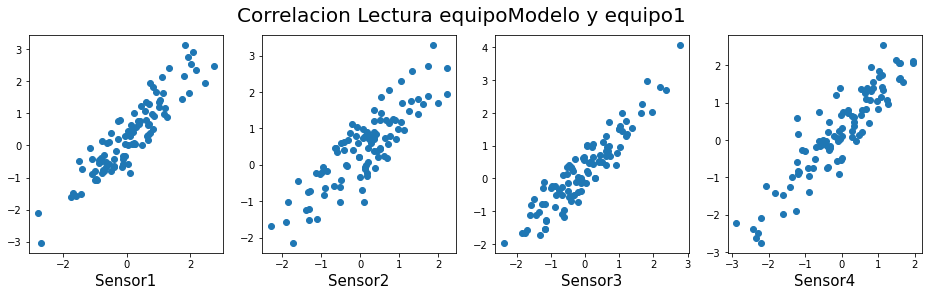

In [10]:
fig,ax  = plt.subplots(1,4,figsize=(16,4))
plt.suptitle("Correlacion Lectura equipoModelo y equipo1", fontsize=20,va='top')
ax = ax.ravel()
for i in range(4):
    ax[i].scatter(equipo_modelo.loc[:,i],equipos['equipo_1'].loc[:,i])
    ax[i].set_xlabel(f"Sensor{i+1}",fontsize=15)
plt.show()

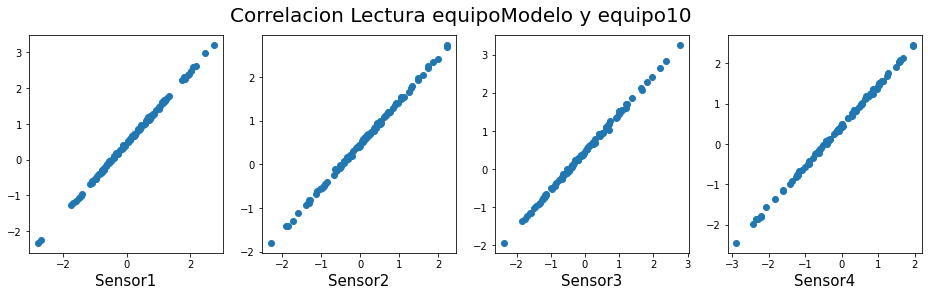

In [11]:
fig,ax  = plt.subplots(1,4,figsize=(16,4))
plt.suptitle("Correlacion Lectura equipoModelo y equipo10", fontsize=20,va='top')
ax = ax.ravel()
for i in range(4):
    ax[i].scatter(equipo_modelo.loc[:,i],equipos['equipo_10'].loc[:,i])
    ax[i].set_xlabel(f"Sensor{i+1}",fontsize=15)
plt.show()

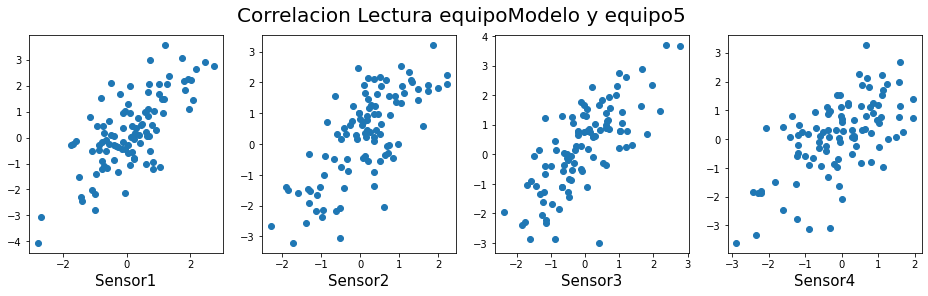

In [12]:
fig,ax  = plt.subplots(1,4,figsize=(16,4))
plt.suptitle("Correlacion Lectura equipoModelo y equipo5", fontsize=20,va='top')
ax = ax.ravel()
for i in range(4):
    ax[i].scatter(equipo_modelo.loc[:,i],equipos['equipo_5'].loc[:,i])
    ax[i].set_xlabel(f"Sensor{i+1}",fontsize=15)
plt.show()

In [13]:
p_correlacion = {'equipo_'+str(i):[] for i in range(1,11)}
for equipo in equipos:
    puntaje = round(equipo_modelo.corrwith(equipos[equipo],axis=1).sum(),2)
    p_correlacion[equipo] = puntaje

In [14]:
def color_vals(x):
    if x > 80:
        return 'forestgreen'
    else:
        return 'firebrick'

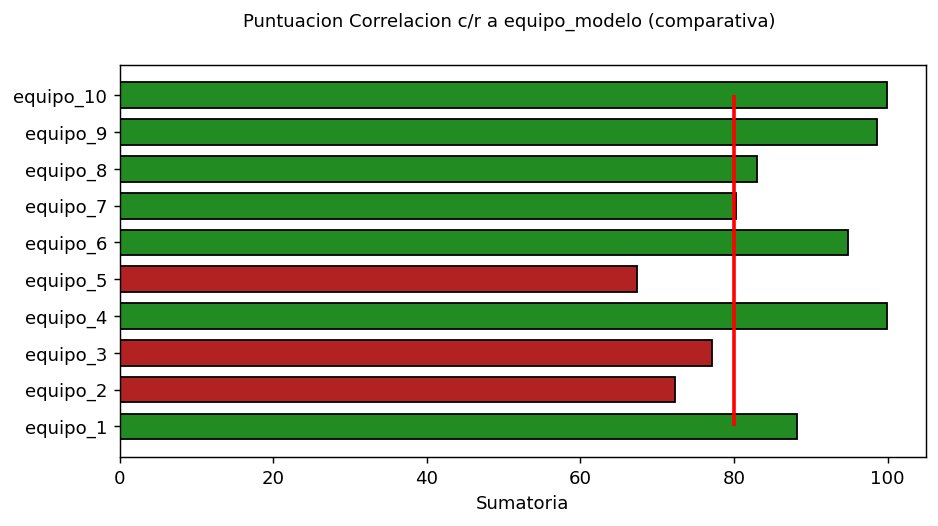

In [15]:
plt.figure(figsize=(8,4),dpi=130)
plt.suptitle("Puntuacion Correlacion c/r a equipo_modelo (comparativa)",fontsize=10,va='top')
plt.barh(y=list(p_correlacion.keys()),width = p_correlacion.values(), 
         color=list(map(color_vals,list(p_correlacion.values()))), edgecolor='k',height=0.7)
plt.vlines(x=80,ymin='equipo_1',ymax='equipo_10',
           linewidth=2,color='red',linestyle='solid')
plt.xlabel("Sumatoria")
plt.show()